# Overview:
In this third practical application assignment, your goal is to compare the performance of the classifiers (k-nearest neighbors, logistic regression, decision trees, and support vector machines) you encountered in this section of the program. You will use a dataset related to the marketing of bank products over the telephone.

## Data:
The dataset you will use comes from the [UCI Machine Learning repository](https://archive.ics.uci.edu/dataset/222/bank+marketing). The data is from a Portuguese banking institution and is a collection of the results of multiple marketing campaigns. You can make use of the article Links to an external site.accompanying the dataset (in the .zip file) for more information on the data and features.

## Deliverables:
After understanding, preparing, and modeling your data, build a Jupyter Notebook that includes a clear statement demonstrating your understanding of the business problem, a correct and concise interpretation of descriptive and inferential statistics, your findings (including actionable insights), and next steps and recommendations.

This is a required assignment and counts toward program completion.

## Submission Instructions:
Submit the website URL to your public-facing GitHub repository here
Your Learning Facilitators will grade your submission according to the rubric below

In [92]:
import pandas as pd
import matplotlib.pyplot as plt

In [94]:
churn = pd.read_csv('data/telecom_churn.csv')
digits, labels = load_digits(return_X_y=True)

In [95]:
#churn data
churn.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### Considerations for Churn model

* many parameters
* strong need to retrain - trends, changes in customer preference, market, performance...
* unbalanced classes


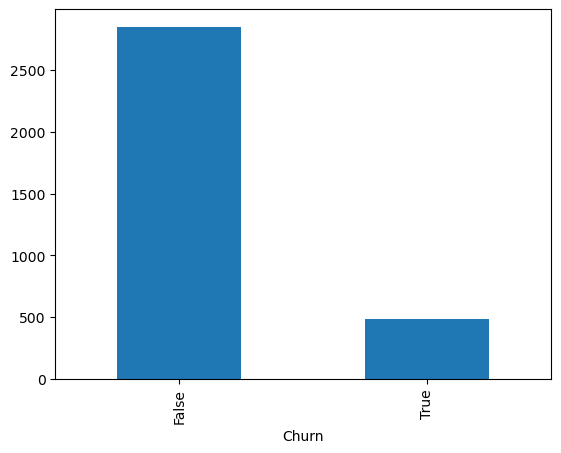

In [96]:
#build a histogram of the Churn counts
churn['Churn'].value_counts().plot(kind='bar')
plt.show()


### Data Prep

In [97]:
# replace the 'True' and 'False' values in the 'Churn' column with 1 and 0
churn['Churn'] = churn['Churn'].astype(int)


In [98]:
# one hot encode 'International plan' and 'Voice mail plan'
churn = pd.get_dummies(churn, columns=['International plan', 'Voice mail plan'])

churn.head()

,State,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,...,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,International plan_No,International plan_Yes,Voice mail plan_No,Voice mail plan_Yes
0,KS,128,415,25,265.1,110,45.07,197.4,99,16.78,...,11.01,10.0,3,2.70,1,0,True,False,False,True
1,OH,107,415,26,161.6,123,27.47,195.5,103,16.62,...,11.45,13.7,3,3.70,1,0,True,False,False,True
2,NJ,137,415,0,243.4,114,41.38,121.2,110,10.30,...,7.32,12.2,5,3.29,0,0,True,False,True,False
3,OH,84,408,0,299.4,71,50.90,61.9,88,5.26,...,8.86,6.6,7,1.78,2,0,False,True,True,False
4,OK,75,415,0,166.7,113,28.34,148.3,122,12.61,...,8.41,10.1,3,2.73,3,0,False,True,True,False


In [99]:
# drop the 'State' and 'Area code' columns

churn.drop(['State', 'Area code'], axis=1, inplace=True)

In [101]:
# set y to the 'Churn' column
y = churn['Churn']

# drop the 'Churn' column from the dataframe
churn.drop('Churn', axis=1, inplace=True)

#set X to the churn dataframe
X = churn


KeyError: 'Churn'

In [103]:

churn_y = y
churn_X = X

In [53]:
#sepate the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [113]:
# do a grid search to find the best hyperparameters for a decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

def dt_model_search(X_train, y_train):
    print('Searching for the best hyperparameters for a Decision Tree Classifier')
    tree = DecisionTreeClassifier(random_state=17)

    tree_params = {'max_depth': range(1, 11),
                    'max_features': range(4, 19)}

    tree_grid = GridSearchCV(tree, tree_params, cv=5, n_jobs=-1, verbose=True)

    tree_grid.fit(X_train, y_train)

    # print the best hyperparameters
    print(tree_grid.best_params_)
    print(tree_grid.best_score_)

    return tree_grid.best_estimator_

clf = dt_model_search(X_train, y_train)


Searching for the best hyperparameters for a Decision Tree Classifier
Fitting 5 folds for each of 150 candidates, totalling 750 fits
{'max_depth': 9, 'max_features': 17}
0.8330163569492838


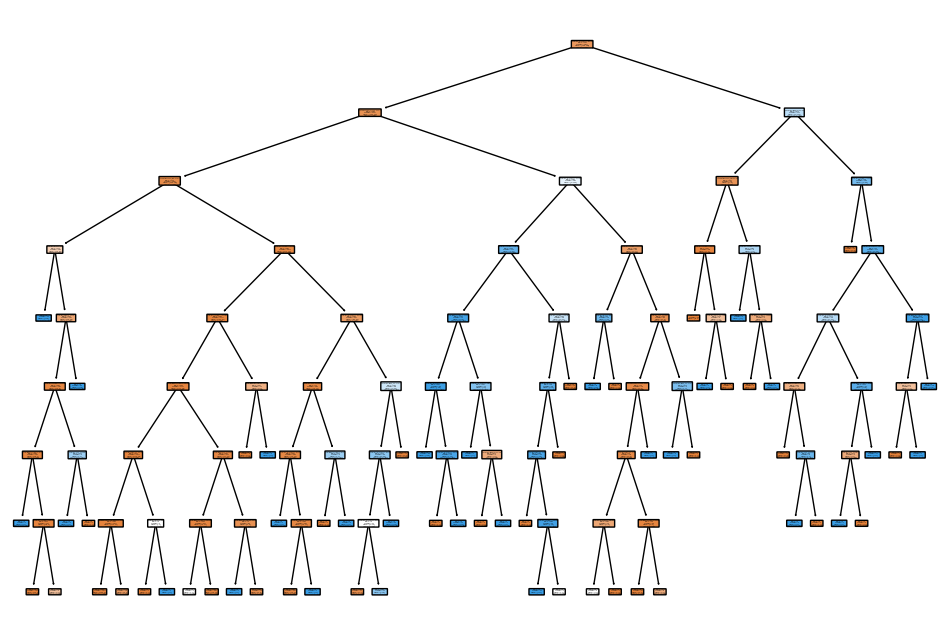

In [71]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Create a plot of the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Churned','Not Churned'], rounded=True)
plt.show()


Feature ranking:
1. feature 2 (0.2462013208593104) - Total day minutes
2. feature 14 (0.1425260831536723) - Customer service calls
3. feature 11 (0.09167963793036843) - Total intl minutes
4. feature 12 (0.08613825910662264) - Total intl calls
5. feature 5 (0.08034687010708286) - Total eve minutes
6. feature 15 (0.07648739795106003) - International plan_No
7. feature 7 (0.06715882572204765) - Total eve charge
8. feature 17 (0.053630362873939144) - Voice mail plan_No
9. feature 4 (0.05022500924700073) - Total day charge
10. feature 10 (0.02928246913393992) - Total night charge
11. feature 18 (0.021963523312023867) - Voice mail plan_Yes
12. feature 3 (0.015716638523820832) - Total day calls
13. feature 8 (0.015506592792601146) - Total night minutes
14. feature 16 (0.008617861369237707) - International plan_Yes
15. feature 0 (0.006439642438519577) - Account length
16. feature 6 (0.002728659885296615) - Total eve calls
17. feature 13 (0.002425475453596991) - Total intl charge
18. feature 9 

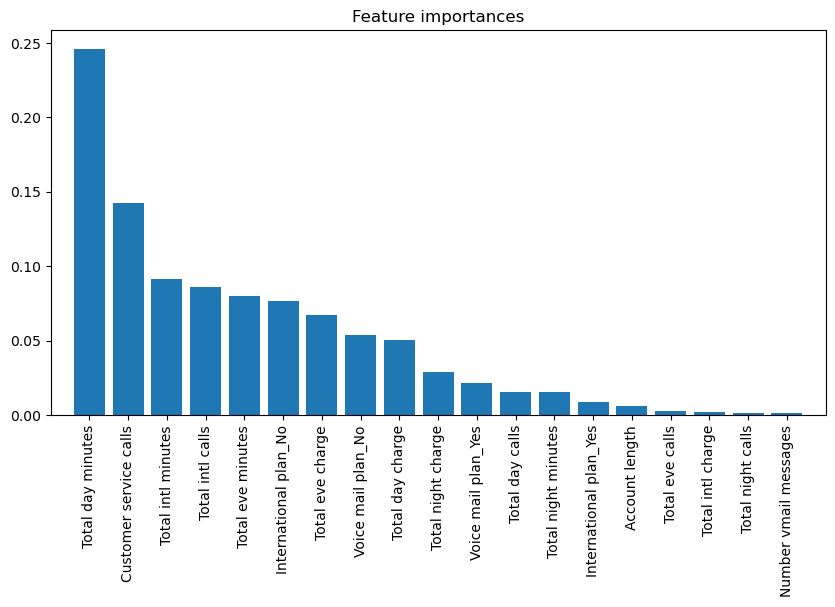

In [73]:
import numpy as np

# show the feature importances
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. feature {indices[f]} ({importances[indices[f]]}) - {X.columns[indices[f]]}")

# plot the feature importances
plt.figure(figsize=(10, 5))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), np.array(X.columns)[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


**TASK 2**: Recognizing Handwritten Digits

Suppose you are tasked with training a model to recognize handwritten digits.  Which of your classifier would you use here and why?  Again, be sure to consider the balance of classes, speed of training, and importance of interpretability.



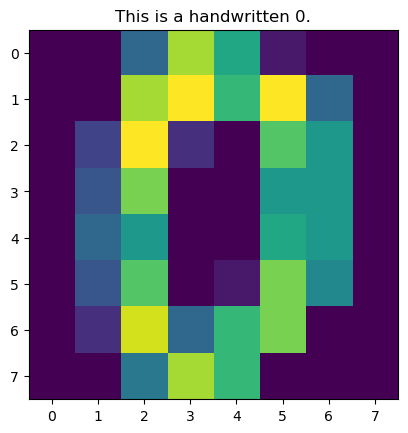

In [5]:
#example image
plt.imshow(digits[0].reshape(8, 8))
plt.title('This is a handwritten 0.');

### Considerations for digits model

* Need to retrain - low
* Most important measure - accuracy
* Need to balance the inputs of the training data
* Amenable to reduction (2x2 grids etc)


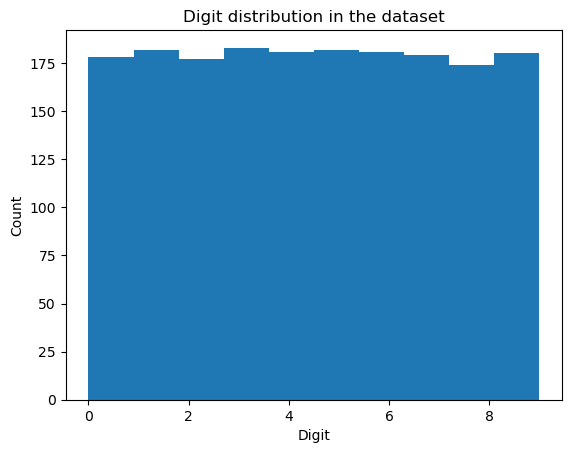

In [10]:
# build a histogram of the labels
plt.hist(labels, bins=10)
plt.title('Digit distribution in the dataset')
plt.xlabel('Digit')
plt.ylabel('Count');
plt.show()


In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(digits, labels, test_size=0.2, random_state=42)


In [121]:

digits_X = digits
digits_y = labels



#### Logistic Regression Model for Digits

In [81]:

# build a logistic regression model to classify the digits
lgr_model = LogisticRegression(max_iter=10000)
%time
lgr_model.fit(X_train, y_train)

y_pred = lgr_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'LR Model accuracy: {accuracy:.2f}')


CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 4.77 µs
LR Model accuracy: 0.97


In [112]:
# do a grid search to find the best hyperparameters for a logistic regression model
from sklearn.model_selection import GridSearchCV

def lgr_search(X_train, y_train):
    print('Searching for the best hyperparameters for a logistic regression model...')
    lgr = LogisticRegression(max_iter=10000)

    lgr_params = {'C': [0.01, 0.1, 1, 10, 100]}
    lgr_grid = GridSearchCV(lgr, lgr_params, cv=5, n_jobs=-1, verbose=True)

    lgr_grid.fit(X_train, y_train)

    return lgr_grid.best_estimator_

lgr_model = lgr_search(X_train, y_train)

# print the best hyperparameters
print(lgr_grid.best_params_)
print(lgr_grid.best_score_)

lgr_model = lgr_grid.best_estimator_

Searching for the best hyperparameters for a logistic regression model...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
{'C': 0.01}
0.9638017808749517


### Decision Tree for Digits

In [77]:
# build a decision tree model to classify the digits
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
%time
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'DT Model accuracy: {accuracy:.2f}')


CPU times: user 1e+03 ns, sys: 1e+03 ns, total: 2 µs
Wall time: 3.81 µs
DT Model accuracy: 0.85


### KNN for Digits

In [125]:
# build a KNN model to classify the digits
from sklearn.neighbors import KNeighborsClassifier

for i in range(1, 11):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train, y_train)
    print(f'KNN Model accuracy with {i} neighbors: {knn_model.score(X_test, y_test)}')
    print(f'KNN Model training accuracy with {i} neighbors: {knn_model.score(X_train, y_train)}')

    


KNN Model accuracy with 1 neighbors: 0.9777777777777777
KNN Model training accuracy with 1 neighbors: 1.0
KNN Model accuracy with 2 neighbors: 0.9805555555555555
KNN Model training accuracy with 2 neighbors: 0.9909533750869868
KNN Model accuracy with 3 neighbors: 0.9833333333333333
KNN Model training accuracy with 3 neighbors: 0.9930410577592206
KNN Model accuracy with 4 neighbors: 0.9805555555555555
KNN Model training accuracy with 4 neighbors: 0.9923451635351427
KNN Model accuracy with 5 neighbors: 0.9861111111111112
KNN Model training accuracy with 5 neighbors: 0.9895615866388309
KNN Model accuracy with 6 neighbors: 0.9888888888888889
KNN Model training accuracy with 6 neighbors: 0.9895615866388309
KNN Model accuracy with 7 neighbors: 0.9888888888888889
KNN Model training accuracy with 7 neighbors: 0.9902574808629089
KNN Model accuracy with 8 neighbors: 0.9861111111111112
KNN Model training accuracy with 8 neighbors: 0.9867780097425192
KNN Model accuracy with 9 neighbors: 0.98055555

In [129]:

knn_model = KNeighborsClassifier(n_neighbors=3)
%time
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'KNN Model accuracy: {accuracy}')
print(f'KNN Model training accuracy: {knn_model.score(X_train, y_train)}')

#print the parameters of the KNN model
print(knn_model.get_params())



CPU times: user 3 µs, sys: 17 µs, total: 20 µs
Wall time: 5.01 µs
KNN Model accuracy: 0.9833333333333333
KNN Model training accuracy: 0.9930410577592206
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}


In [127]:
# do a grid search to find the best parameters for the KNN model
from sklearn.model_selection import GridSearchCV

def knn_search(X_train, y_train):
    print('Searching for the best parameters for the KNN model')
    knn = KNeighborsClassifier()

    knn_params = {
        'n_neighbors': [3],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    }

    knn_grid = GridSearchCV(knn, knn_params, cv=5, n_jobs=-1, verbose=True)

    knn_grid.fit(X_train, y_train)

    print(knn_grid.best_params_)
    print(knn_grid.best_score_)

    return knn_grid.best_estimator_

knn_model = knn_search(X_train, y_train)


Searching for the best parameters for the KNN model
Fitting 5 folds for each of 4 candidates, totalling 20 fits
{'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
0.9867789392179637


### SVM for digits

In [61]:
#build an SVM model to classify the digits
from sklearn.svm import SVC

svm_model = SVC()
%time
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'SVM Model accuracy: {accuracy:.2f}')


CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 4.05 µs
SVM Model accuracy: 0.87


In [111]:
def svm_search(X_train, y_train):
    print('Searching for the best parameters for the SVM model')
    svm = SVC()

    svm_params = {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }

    svm_grid = GridSearchCV(svm, svm_params, cv=5, n_jobs=-1, verbose=True)

    svm_grid.fit(X_train, y_train)

    print(svm_grid.best_params_)
    print(svm_grid.best_score_)

    return svm_grid.best_estimator_

svm_model = svm_search(X_train, y_train)

Searching for the best parameters for the SVM model
Fitting 5 folds for each of 12 candidates, totalling 60 fits
{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.9916545683313978


In [117]:
# build a dataframe to store the results

res_dict = {'model': ['KNN', 'Logistic Regression', 'DT', 'SVC'],
           'train score': [0, 0, 0, 0],
           'test score': [0, 0, 0, 0],
           'fit time': [0, 0, 0, 0]}
results_df = pd.DataFrame(res_dict).set_index('model')

In [114]:
from time import time

def run_grids(X, y, title) :
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    knn_model = knn_search(X_train, y_train)
    lgr_model = lgr_search(X_train, y_train)
    dt_model = dt_model_search(X_train, y_train)
    svm_model = svm_search(X_train, y_train)

    models = [knn_model, lgr_model, dt_model, svm_model]

    for i, model in enumerate(models):
        start = time()
        model.fit(X_train, y_train)
        end = time()
        fit_time = end - start
        
        results_df.loc[results_df.index[i], 'train score'] = model.score(X_train, y_train)
        results_df.loc[results_df.index[i], 'test score'] = model.score(X_test, y_test)
        results_df.loc[results_df.index[i], 'fit time'] = fit_time

    #save the results to a csv file
    results_df.to_csv('./data/' + title + '_results.csv')
    print(results_df)







In [128]:
run_grids(digits_X, digits_y, 'digits')
run_grids(churn_X, churn_y, 'churn')

Searching for the best parameters for the KNN model
Fitting 5 folds for each of 4 candidates, totalling 20 fits
{'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
0.9867789392179637
Searching for the best hyperparameters for a logistic regression model...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Searching for the best hyperparameters for a Decision Tree Classifier
Fitting 5 folds for each of 150 candidates, totalling 750 fits
{'max_depth': 9, 'max_features': 17}
0.8330163569492838
Searching for the best parameters for the SVM model
Fitting 5 folds for each of 12 candidates, totalling 60 fits
{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.9916545683313978
                     train score  test score  fit time
model                                                 
KNN                     1.000000    0.983333  0.000660
Logistic Regression     0.990953    0.975000  0.964450
DT                      0.933194    0.836111  0.003775
SVC                     1.000000    0.986111

# Comparison Matrix for Model Types

| **Model**                  | **Handles Imbalanced Classes** | **Training Speed**     | **Interpretability** |
|----------------------------|--------------------------------|------------------------|----------------------|
| **Logistic Regression**     | Fair <br>(can use regularization, balanced class weights) | Fast                  | High <br>(coefficients are interpretable) |
| **Decision Trees**          | Fair <br>(prone to overfitting with imbalanced data) | Fast                  | High <br>(easy to visualize decision rules) |
| **k-Nearest Neighbors (k-NN)** | Poor <br>(sensitive to imbalanced data, performs poorly without special techniques) | Slow <br>(scales poorly with large datasets) | Low <br>(no interpretable model structure) |
| **Support Vector Machines (SVM)** | Poor <br>(sensitive to imbalance, can use class weights) | Slow <br>(especially for large datasets) | Low <br>(hard to interpret, especially in high dimensions) |
